In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.matshow(X_train[index])

<Figure size 720x72 with 0 Axes>

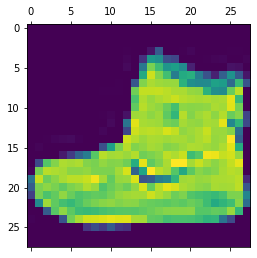

In [11]:
plot_sample(0)

In [12]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [13]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [14]:
classes[y_train[3]]

'Dress'

In [15]:
X_train[0].shape

(28, 28)

In [16]:
y_train.shape

(60000,)

In [17]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [18]:
y_train_categorical = keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')

In [19]:
y_test_categorical = keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [21]:
model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(X_train_scaled,y_train_categorical,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4720 - accuracy: 0.8281
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3585 - accuracy: 0.8677
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3215 - accuracy: 0.8824
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2961 - accuracy: 0.8899
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2785 - accuracy: 0.8950


In [23]:
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 1s 1ms/step


9

In [24]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 0s 1ms/step


'Ankle boot'

In [25]:
np.argmax(model.predict(X_test_scaled)[3])

313/313 [==============================] - 0s 1ms/step


1

In [26]:
classes[np.argmax(model.predict(X_test_scaled)[3])]

313/313 [==============================] - 0s 1ms/step


'Trouser'

<Figure size 720x72 with 0 Axes>

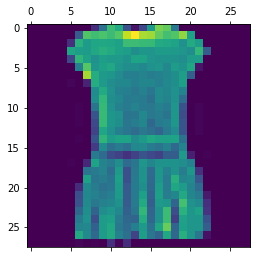

In [27]:
plot_sample(3)

In [28]:
def get_model():
  model1=keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(3000,activation='relu'),
  keras.layers.Dense(1000,activation='relu'),
  keras.layers.Dense(10,activation='sigmoid')])
  model1.compile(optimizer="adam",loss='categorical_crossentropy',metrics=['accuracy'])
  return model1

In [29]:
%%timeit -n1 -r1
with tf.device('GPU'):
  GPU_model = get_model()
  GPU_model.fit(X_train_scaled,y_train_categorical,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4728 - accuracy: 0.8288
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3597 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3233 - accuracy: 0.8789
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2954 - accuracy: 0.8898
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2794 - accuracy: 0.8950
41.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 3000)              2355000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 5,366,010
Trainable params: 5,366,010
Non-trainable params: 0
_________________________________________________________________


In [32]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred= model.predict(X_test_scaled)
y_pred_classes=[np.argmax(i) for i in y_pred]
print("Classification report\n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 3ms/step
Classification report
               precision    recall  f1-score   support

           0       0.87      0.75      0.81      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.75      0.79      1000
           3       0.87      0.90      0.88      1000
           4       0.75      0.86      0.80      1000
           5       0.98      0.93      0.96      1000
           6       0.67      0.70      0.68      1000
           7       0.92      0.96      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

